In [1]:
import pandas as pd
import numpy as np
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts import project_functions

path = 'C:/Users/Home Computer/Desktop/temp/insurance.csv'

df = project_functions.load_clean_df(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now that the data is loaded, we will perform EDA with help using the methods in our script.

Lets get a general idea of our dataset.

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


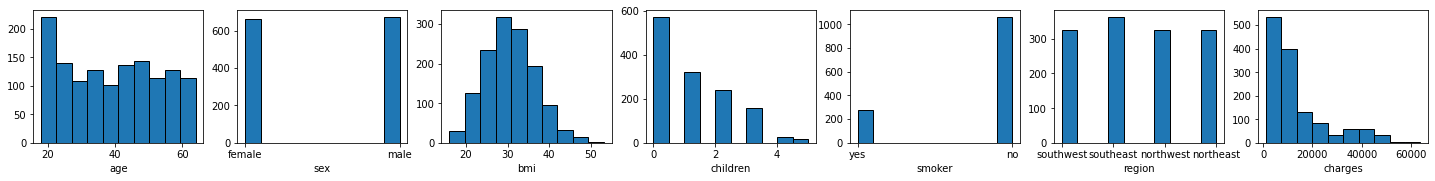

In [2]:
project_functions.display_big_picture(df)

From this we see that the age is somewhat even, apart from an overrepresented ~18-22 range.

Sex is very even.

BMI follows a roughly normal curve, with the mean BMI ~= 30.

The mean number of children is ~= 1, but the most represented group is those without children.

The strong majority of patients are non-smokers.

There is an even distribution between regions.

Most people have low medical expenses.




Now that we have a good idea of how the data looks, lets probe into some of the differences, e.g., do smokers pay more etc.?